In [1]:
# This line is a convenience to import most packages you'll need. You may need to import others (e.g. random and cmath)
import IPython, numpy as np, scipy as sp, matplotlib.pyplot as plt, matplotlib, sklearn, librosa, cmath,math, csv
from IPython.display import Audio
from sklearn.datasets import load_iris
import librosa.display
%matplotlib inline

chord_data = librosa.load('c.wav', sr= 8000)
chord = chord_data[0]
print(len(chord))
sr = chord_data[1]
Audio(chord, rate=sr)


7244


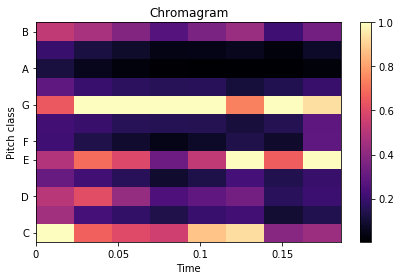

In [2]:
chromagram = librosa.feature.chroma_stft(chord, sr=sr, n_fft=2048, hop_length=1024)

librosa.display.specshow(chromagram,y_axis='chroma',x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()


194.14531


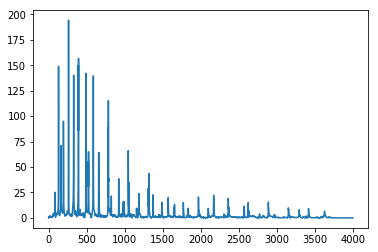

In [14]:
fft_chroma_test = np.fft.fft(chord)
fft_chroma_test = np.abs(fft_chroma_test)
Nf = np.shape(fft_chroma_test)[0]
fft_chroma_test = fft_chroma_test[0:int(Nf/2)+1] 

plt.figure(1)

freq_arr = np.arange(int(Nf/2)+1) * (sr/win_len)
plt.plot(freq_arr,fft_chroma_test)
#plt.xlim([0,2000])
print(np.max(fft_chroma_test))



194.14531
[392.07048458 328.1938326  165.19823789 262.11453744]
(227,)


ValueError: Unable to create correctly shaped tuple from ([1, 1], [0, 0])

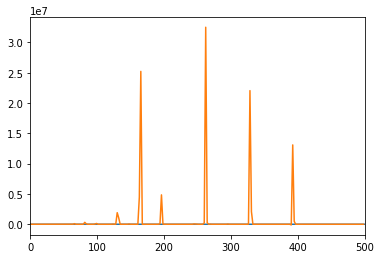

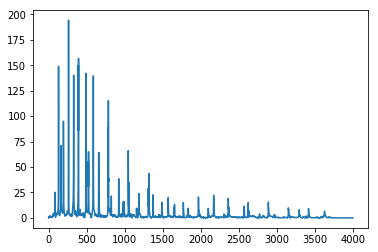

In [50]:
#chord = sp.signal.windows.hann(len(chord)) * chord

hps1 = sp.signal.decimate(fft_chroma_test, 1)
hps2 = sp.signal.decimate(fft_chroma_test, 2)
hps3 = sp.signal.decimate(fft_chroma_test, 4)
hps4 = sp.signal.decimate(fft_chroma_test, 8)
hps5 = sp.signal.decimate(fft_chroma_test, 16)

plt.figure(0)
win_len2 = len(hps1)
freq_arr2 = np.arange(win_len2) * ((sr/2)/win_len2)
plt.plot(freq_arr2, hps1)
#plt.xlim([0,2000])
'''
plt.figure(1)
hps2 = sp.signal.decimate(fft_chord, 8)
win_len2 = len(hps2)
freq_arr2 = np.arange(win_len2) * ((sr/8)/win_len2)
plt.plot(freq_arr2, hps2)
plt.xlim([0,2000])

'''
# Calculation for HPS 

y = np.zeros(len(hps5))
for i in range(len(hps5)):
    product = hps1[i] * hps2[i] * hps3[i] * hps4[i] * hps5[i]
    y[i] = product

# Plot for HPS

plt.figure(0)
win_len2 = len(y)
freq_arr2 = np.arange(win_len2) * ((sr/16)/win_len2)
plt.xlim([0,500])
plt.plot(freq_arr2, y)

fft_chroma_test = np.fft.fft(chord)
fft_chroma_test = np.abs(fft_chroma_test)
Nf = np.shape(fft_chroma_test)[0]
fft_chroma_test = fft_chroma_test[0:int(Nf/2)+1] 

plt.figure(1)

freq_arr = np.arange(int(Nf/2)+1) * (sr/win_len)
plt.plot(freq_arr,fft_chroma_test)
print(np.max(fft_chroma_test))
ind = np.argsort(y)
ind = ind*((sr/16)/win_len2)
leng = np.shape(ind)[0]
print(str(ind[leng-4:leng]))
sroit = sr/16
print(str(np.shape(y)))
spec = librosa.feature.chroma_stft(S=y)
librosa.display.specshow(spec, y_axis='chroma',x_axis='time')
plt.colorbar()
plt.title('ChromaGRAM')
plt.tight_layout()
plt.show()
